In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn 

In [62]:
paths = pd.read_csv('./pt_report_for_plotting')

In [63]:
#paths = paths.sort_values(['logic level'], ascending=True)

paths

,Unnamed: 0,path number,logic level,data path delay,start point
0,0,0,28,0.985,PMYBFCAO/sxemrhri/D
1,1,1,20,0.724,HVCRXBIB/ddfpzdsz/D
2,2,2,28,1.035,ZTDYXSGB/cwdoxyxl/E
3,3,3,30,0.993,ORIHGSTR/xkmzhizf/D
4,4,4,21,0.740,FLMOGNPW/umwydmph/E
...,...,...,...,...,...
95,95,95,20,0.683,LCLZUUQJ/mxevwzzg/Q
96,96,96,19,0.631,GYWZBSXM/xmxliqnw/Q
97,97,97,29,1.064,HFCVUINX/yidwpzly/E
98,98,98,34,1.196,VRKANCAQ/duqyfcqb/D


In [65]:
paths = paths.drop('Unnamed: 0', axis=1)

In [66]:
paths.columns

Index(['path number', 'logic level', 'data path delay', 'start point'], dtype='object')

In [67]:
paths.describe()

,path number,logic level,data path delay
count,100.000000,100.000000,100.000000
mean,49.500000,24.410000,0.835690
std,29.011492,5.532448,0.192576
min,0.000000,15.000000,0.501000
25%,24.750000,20.000000,0.686000
50%,49.500000,23.500000,0.807500
75%,74.250000,29.250000,0.995750
max,99.000000,34.000000,1.196000


Find paths whose data path delay is bigger than average, and see what the worst path is

In [71]:
#paths.loc[paths['cur_data_delay'] > paths['cur_data_delay'].mean()].sort_values(['cur_data_delay'], ascending=False).iloc[0]

paths.loc[paths['data path delay'] > paths['data path delay'].mean()].sort_values(['data path delay'], ascending=False).iloc[0]

path number                         98
logic level                         34
data path delay                  1.196
start point        VRKANCAQ/duqyfcqb/D
Name: 98, dtype: object

In [27]:
#paths['cur_logic_lvl'].mean()

In [28]:
#paths['total data delay'] = paths['pre_data_delay'] + paths['cur_data_delay'] + paths['post_data_delay']
paths.head(5)

,path number,logic level,data path delay,start point
29,29,15,0.518,EUTVDSRQ/pipqmdwi/Q
61,61,15,0.598,RFGQOGYW/vfjnvxgi/E
35,35,15,0.565,GKSCIPWE/mofdlxvh/D
89,89,15,0.501,JXTPOACA/wsytmlhk/E
48,48,16,0.611,BMADZSFI/giwunnoq/D


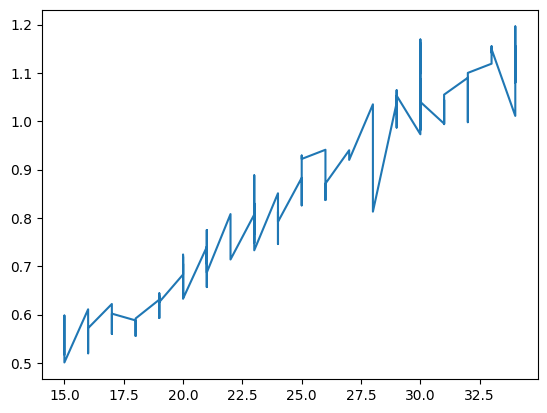

In [30]:
plt.plot(paths['logic level'], paths['data path delay'])

In [32]:
sizes = [3,4,2]

In [35]:
bias = [np.random.randn(y, 1) for y in sizes[1:]]
bias

[array([[-0.68372271],
        [ 0.30733199],
        [-0.35836384],
        [-1.11426035]]),
 array([[-0.57288062],
        [-0.26260415]])]

In [47]:
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
weights

[array([[ 0.47096034, -1.50662032,  1.81032896],
        [ 0.01452737,  0.01441437,  0.08248271],
        [-1.12274976,  0.03113776,  0.42491313],
        [ 0.0689576 , -1.36014948,  0.78640487]]),
 array([[ 0.17740065,  1.19030902, -1.7447092 , -1.64214265],
        [ 1.66230964, -1.50420814,  0.04993054, -0.83549952]])]

In [40]:
sizes[:-1]

[3, 4]

In [45]:
sizes[1:]

[4, 2]

In [46]:
for x, y in zip(sizes[:-1], sizes[1:]):
    print(f"x is {x}\ny is {y}")

x is 3
y is 4
x is 4
y is 2


In [56]:
a1 = np.array([2, 1])
T = np.array([[2, 2], [2, 2], [2, 2]])
T @ a1 

array([6, 6, 6])